In [3]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

In [4]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty.aws
engr1330content
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 16 Mar 2021

## Lesson 20 : Multiple Linear Regression

A procedure to use additional variables to make predictions.  OLS is not confined to a single explainatory variable; we can consider a collection of explainatory variables.

## Objectives
- To apply fundamental concepts involved in data modeling and regression;
  - Is a single variable a good estimator of the target process?
  - 
---

## Computational Thinking Concepts
The CT concepts include:

- Abstraction => Represent data behavior with a model
- Pattern Recognition => Compare patterns in (our) data models to make a decision
---

# Textbook Resources

[https://inferentialthinking.com/chapters/15/Prediction.html](https://inferentialthinking.com/chapters/15/Prediction.html)

You know the URL that no-one reads, perhaps because there is a "secret" module you need to install, without instructions of how! 

<hr>


# An example of Multiple Linear Regression

As an example consider EcommerceCustomers and the effect, if any, of advertising.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
ecom = pd.read_csv("EcommerceCustomers.csv") # Read the file as a .CSV assign to a dataframe evapdf
ecom.head() # check structure

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

<AxesSubplot:xlabel='Length of Membership'>

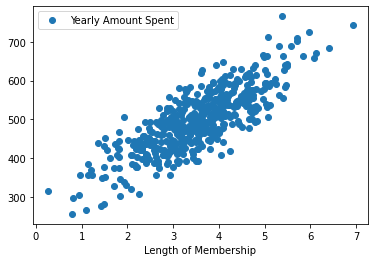

In [62]:
ecom.plot(x="Length of Membership", y="Yearly Amount Spent", style='o')

In [43]:
#advrt = pd.read_csv("advertisingB.csv") # Read the file as a .CSV assign to a dataframe 
#advrt.head() # check structure

In [44]:
def linearsolver(A,b):
    n = len(A)
    M = A

    i = 0
    for x in M:
     x.append(b[i])
     i += 1

    for k in range(n):
     for i in range(k,n):
       if abs(M[i][k]) > abs(M[k][k]):
          M[k], M[i] = M[i],M[k]
       else:
          pass

     for j in range(k+1,n):
         q = float(M[j][k]) / M[k][k]
         for m in range(k, n+1):
            M[j][m] -=  q * M[k][m]

    x = [0 for i in range(n)]

    x[n-1] =float(M[n-1][n])/M[n-1][n-1]
    for i in range (n-1,-1,-1):
      z = 0
      for j in range(i+1,n):
          z = z  + float(M[i][j])*x[j]
      x[i] = float(M[i][n] - z)/M[i][i]
#    print (x)
    return(x)

def matrixvectormult(amatrix,xvector,rowNumA,colNumA):
    bvector=[0.0 for i in range(rowNumA)]
    for i in range(0,rowNumA):
        for j in range(0,1):
            for k in range(0,colNumA):
                bvector[i]=bvector[i]+amatrix[i][k]*xvector[k]
    return(bvector)

In [45]:
apptime=ecom["Time on App"]
seslen=ecom["Avg. Session Length"]
memlen=ecom["Length of Membership"]
webtime=ecom["Time on Website"]
moneyshot=ecom["Yearly Amount Spent"]

In [46]:
colNum = 5
rowNum = len(moneyshot)
excitation_matrix = [[0 for j in range(colNum)] for i in range(rowNum)]
#result_matrix = [[0 for j in range(colNumB)] for i in range(rowNumA)]
for i in range(0,rowNum):
    excitation_matrix[i][0]=1
    excitation_matrix[i][1]=apptime[i]
    excitation_matrix[i][2]=seslen[i]
    excitation_matrix[i][3]=memlen[i]
    excitation_matrix[i][4]=webtime[i]
# observe the triple for-loop structure and the counting scheme
xt_matrix = [[0 for j in range(rowNum)] for i in range(colNum)] #transpose the matrix
for i in range(0,rowNum):
    for j in range(0,colNum):
        xt_matrix[j][i]=excitation_matrix[i][j]
rowNumA = 5 # a == transpose(excitation_matrix)
colNumA = rowNum 
rowNumB = rowNum
colNumB = 5 # b == excitation_matrix
xtx_matrix = [[0 for j in range(colNumB)] for i in range(rowNumA)]
for i in range(0,rowNumA):
    for j in range(0,colNumB):
        for k in range(0,colNumA):
            xtx_matrix[i][j]=xtx_matrix[i][j]+xt_matrix[i][k]*excitation_matrix[k][j]
# observe the triple for-loop structure and the counting scheme
xty_vector = []
xty_vector = matrixvectormult(xt_matrix,moneyshot,rowNumA,colNumA)

In [47]:
# copy amatrix into cmatrix
cmatrix = [[xtx_matrix[i][j] for j in range(colNumB)]for i in range(rowNumA)]
dvector = [xty_vector[i] for i in range(rowNumA)]

dvector = linearsolver(xtx_matrix,xty_vector)

In [48]:
dvector

[-1051.5942552997137,
 38.709153810827736,
 25.734271084677594,
 61.57732375487672,
 0.4367388355965311]

In [49]:
def moneyShot(app_time,session_length,member_length,website_time):
    moneyShot = -1051.5942552997137+38.709153810827736*app_time+25.734271084677594*session_length+61.57732375487672*member_length+0.4367388355965311*website_time
    return(moneyShot)

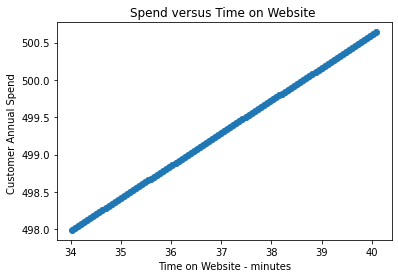

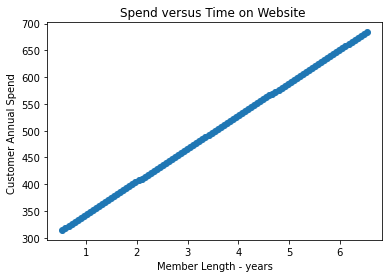

In [51]:
predicted_spend = []
webtime = []
avgtim=ecom["Time on App"].mean()
avgses=ecom["Avg. Session Length"].mean()
avgmem=ecom["Length of Membership"].mean()
avgweb=ecom["Time on Website"].mean()
varweb=ecom["Time on Website"].std()

low = avgweb - 3*varweb
high = avgweb + 3*varweb
hilo = high - low
for i in range(101):
    wtime = low + float(i)*hilo/100.
    webtime.append(wtime)
    predicted_spend.append(moneyShot(avgtim,avgses,avgmem,wtime))
    
import matplotlib.pyplot 
matplotlib.pyplot.scatter(webtime,predicted_spend)
matplotlib.pyplot.xlabel('Time on Website - minutes')
matplotlib.pyplot.ylabel('Customer Annual Spend ')
matplotlib.pyplot.xlabel('Time on Website - minutes')
matplotlib.pyplot.title('Spend versus Time on Website ')
matplotlib.pyplot.show()

# In class - add other components; examine apparent slope
predicted_spend = []
predictor = []
avgtim=ecom["Time on App"].mean()
avgses=ecom["Avg. Session Length"].mean()
avgmem=ecom["Length of Membership"].mean()
varmem=ecom["Length of Membership"].std()
avgweb=ecom["Time on Website"].mean()
varweb=ecom["Time on Website"].std()

low = avgmem - 3*varmem
high = avgmem + 3*varmem
hilo = high - low
for i in range(101):
    wtime = low + float(i)*hilo/100.
    predictor.append(wtime)
    predicted_spend.append(moneyShot(avgtim,avgses,wtime,avgweb))
    
import matplotlib.pyplot 
matplotlib.pyplot.scatter(predictor,predicted_spend)
matplotlib.pyplot.xlabel('Member Length - years')
matplotlib.pyplot.ylabel('Customer Annual Spend ')
matplotlib.pyplot.title('Spend versus Time on Website ')
matplotlib.pyplot.show()

# Weighted Least Squares

https://scipython.com/book/chapter-8-scipy/examples/weighted-and-non-weighted-least-squares-fitting/

Consider our last lesson where we used linear algebra to construct OLS regressions

$\mathbf{X^T}\mathbf{Y}=\mathbf{X^T}\mathbf{X}\mathbf{\beta}$ 

If we were to insert an identy matrix (1s on the diagonal, 0s elsewhere) we could write:

$\mathbf{X^T}\mathbf{I}\mathbf{Y}=\mathbf{X^T}\mathbf{I}\mathbf{X}\mathbf{\beta}$  and there is no change.


https://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html

In [52]:
# copy/adapted from https://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html


from __future__ import print_function
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

In [53]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[int(nsample * 6/10):] = 3
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
X = X[:,[0,1]]


In [55]:
mod_wls = sm.WLS(y, X, weights=1./w)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            WLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     487.9
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           8.52e-27
Time:                        15:45:25   Log-Likelihood:                -57.048
No. Observations:                  50   AIC:                             118.1
Df Residuals:                      48   BIC:                             121.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2726      0.185     28.488      0.0

In [56]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)

[5.24256099 0.43486879]
[5.27260714 0.43794441]


In [57]:
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb,X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, res_ols.df_resid)

In [58]:
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)

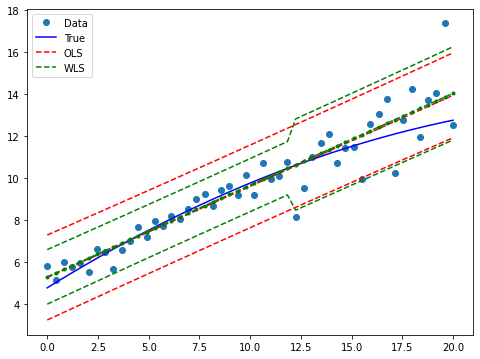

In [59]:
prstd, iv_l, iv_u = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_u, 'g--', label="WLS")
ax.plot(x, iv_l, 'g--')
ax.legend(loc="best");

In [16]:
resid1 = res_ols.resid[w==1.]
var1 = resid1.var(ddof=int(res_ols.df_model)+1)
resid2 = res_ols.resid[w!=1.]
var2 = resid2.var(ddof=int(res_ols.df_model)+1)
w_est = w.copy()
w_est[w!=1.] = np.sqrt(var2) / np.sqrt(var1)
res_fwls = sm.WLS(y, X, 1./w_est).fit()
print(res_fwls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            WLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     253.8
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           8.51e-21
Time:                        13:07:55   Log-Likelihood:                -74.830
No. Observations:                  50   AIC:                             153.7
Df Residuals:                      48   BIC:                             157.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0946      0.267     19.052      0.0

https://en.wikipedia.org/wiki/Weighted_least_squares

https://scipython.com/book/chapter-8-scipy/examples/weighted-and-non-weighted-least-squares-fitting/